<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/ML-projects-new/blob/main/Net_ml_hw6_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Деревья решений

# Задание
**Цель**: изучить применение дерева решений в рамках задачи регрессии
Описание задания:

В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

# Этапы работы:

# 1 Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True).frame

In [ ]:
data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data1 = fetch_california_housing()
X = pd.DataFrame(data1['data'], columns=data1['feature_names'])
y = data.MedHouseVal

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

# 2 Проведите первичный анализ.
## a.Проверьте данные на пропуски. Удалите в случае обнаружения.

In [ ]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## b.*Нормализуйте один из признаков.

In [ ]:
data3 = fetch_california_housing()
y_tree = data3['target']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(data.Population.array.reshape(-1, 1))

MinMaxScaler()

In [ ]:
mms.data_min_

array([3.])

In [ ]:
data.Population.array.reshape(-1, 1).min()

3.0

In [ ]:
mms.data_max_

array([35682.])

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
data.Population.array.reshape(-1, 1).max()

35682.0

In [ ]:
mms.transform(data.Population.array.reshape(-1, 1))

array([[0.00894083],
       [0.0672104 ],
       [0.01381765],
       ...,
       [0.0281398 ],
       [0.02068444],
       [0.03879032]])

In [ ]:
data_population_norm = pd.DataFrame(mms.transform(data.Population.array.reshape(-1, 1)))
data_population_norm # хотя это можно было не делать, массив уже сделан был выше

,0
0,0.008941
1,0.067210
2,0.013818
3,0.015555
4,0.015752
...,...
20635,0.023599
20636,0.009894
20637,0.028140
20638,0.020684


# 3 Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

# 4 Обучите модель регрессии на обучающем множестве.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# 5 Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [ ]:
pred = lr.predict(X_test)

In [ ]:
pred_df = pd.DataFrame({
    'ground truth': y_test,
    'prediction': pred
})

pred_df

,ground truth,prediction
20303,1.67400,3.005118
16966,3.54100,2.566922
10623,1.60200,2.338001
6146,1.40800,1.714080
2208,1.07800,1.763342
...,...,...
3263,1.06300,1.251117
11694,3.93700,3.242027
1729,1.31300,2.356989
5087,0.92300,1.182439


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
r2_score1 = r2_score(pred_df['ground truth'], pred_df['prediction'])
r2_score1

0.6009790143129111

In [ ]:
rmse1 = np.sqrt(mean_squared_error(pred_df['ground truth'], pred_df['prediction']))
rmse1

0.737891734750625

# 6 Обучите дерево решений на обучающем множестве.

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = DecisionTreeRegressor(max_depth=2)

In [ ]:
clf.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [ ]:
clf.predict(X)

array([4.21643103, 4.21643103, 4.21643103, ..., 1.35692957, 1.35692957,
       1.35692957])

## a. Повторите п. 5 для полученной модели.

In [ ]:
pred_tree = clf.predict(X_test)

In [ ]:
pred_df_tree = pd.DataFrame({
    'ground truth': y_test,
    'prediction': pred_tree
})

pred_df_tree

,ground truth,prediction
20303,1.67400,2.905507
16966,3.54100,2.088733
10623,1.60200,2.088733
6146,1.40800,2.088733
2208,1.07800,2.088733
...,...,...
3263,1.06300,1.356930
11694,3.93700,4.216431
1729,1.31300,2.088733
5087,0.92300,1.356930


In [ ]:
r2_score_tree = r2_score(pred_df_tree['ground truth'], pred_df_tree['prediction'])
rmse_tree = np.sqrt(mean_squared_error(pred_df_tree['ground truth'], pred_df_tree['prediction']))
print(rmse_tree)
print(r2_score_tree)

0.8626933914635887
0.45458963381039674


## b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.


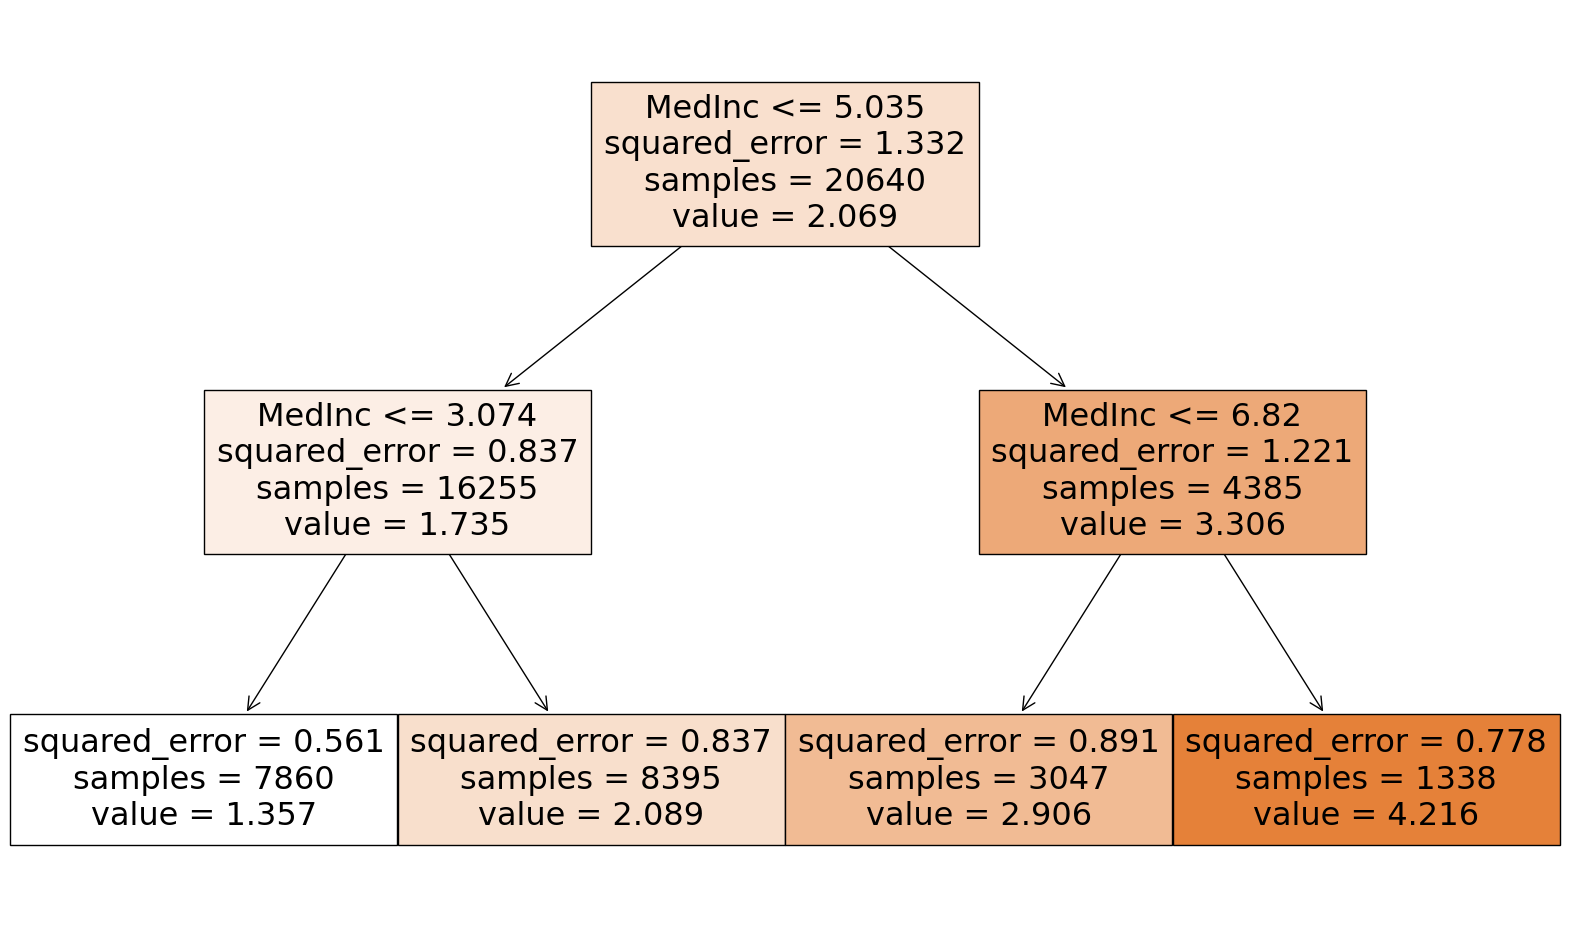

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X_test.columns, filled=True);

# 7 Оптимизируйте глубину дерева (max_depth).
*Оптимизируйте ещё один параметр модели на выбор.

In [ ]:
clf1 = DecisionTreeRegressor(max_depth=10)

In [ ]:
clf1.fit(X, y)

DecisionTreeRegressor(max_depth=10)

In [ ]:
pred_tree2 = clf1.predict(X_test)

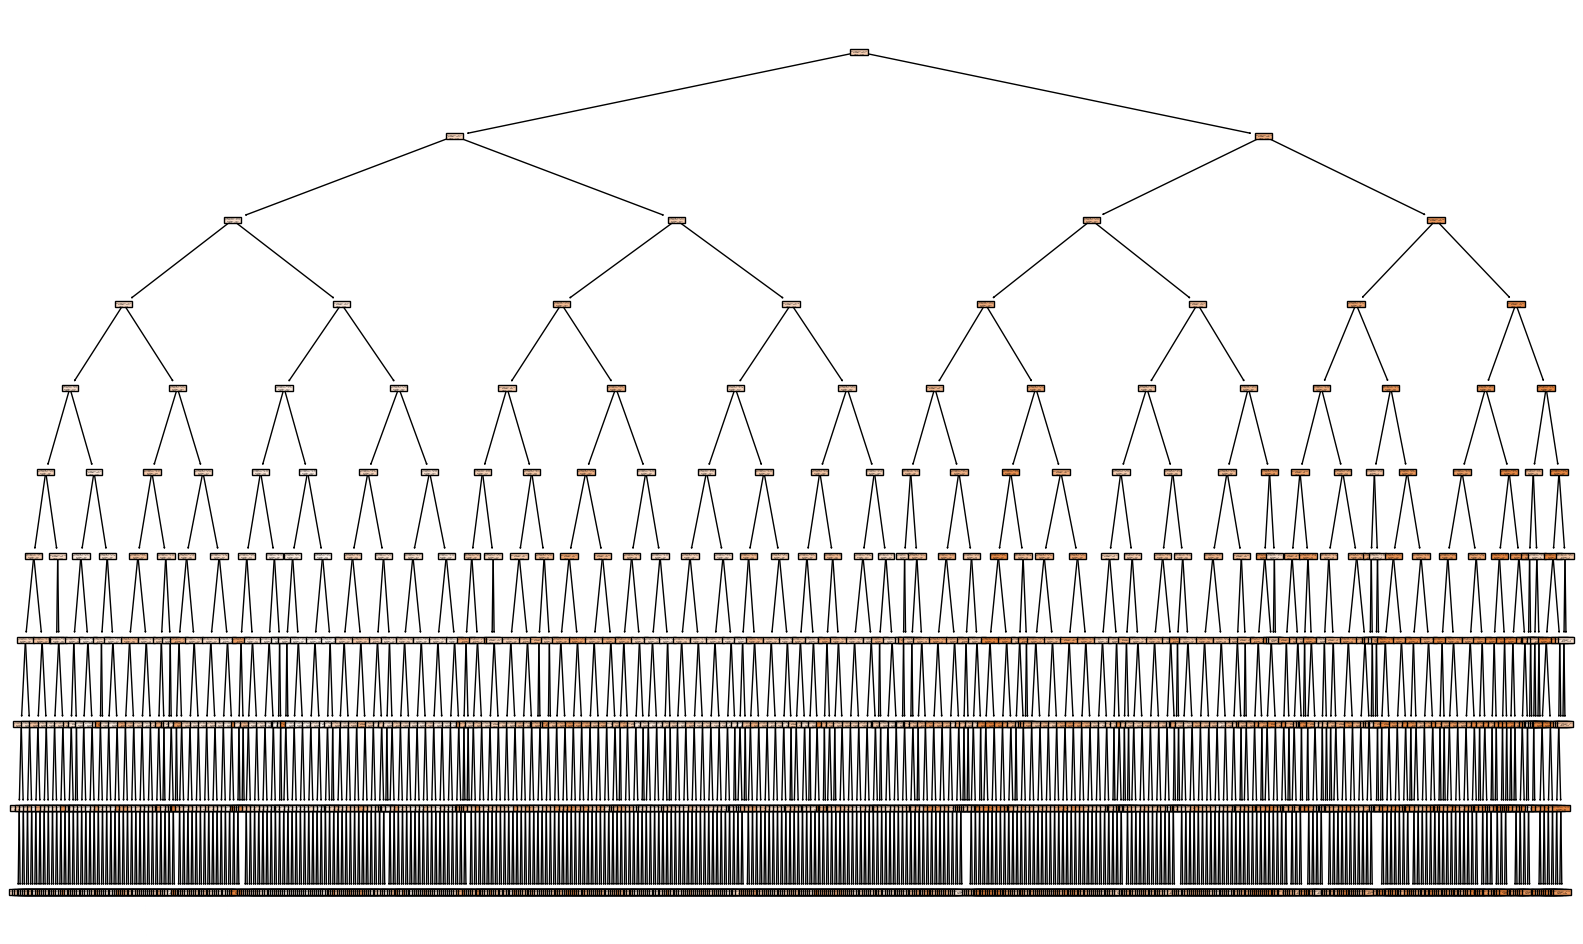

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(clf1, feature_names=X_test.columns, filled=True);

## a. Повторите п. 5 для полученной модели.

In [ ]:
pred_tree2 = clf1.predict(X_test)

In [ ]:
pred_df_tree2 = pd.DataFrame({
    'ground truth': y_test,
    'prediction': pred_tree2
})

pred_df_tree2

,ground truth,prediction
20303,1.67400,1.494184
16966,3.54100,3.508903
10623,1.60200,1.854536
6146,1.40800,1.578174
2208,1.07800,1.106000
...,...,...
3263,1.06300,1.113041
11694,3.93700,3.475972
1729,1.31300,1.797514
5087,0.92300,1.172187


In [ ]:
r2_score_tree2 = r2_score(pred_df_tree2['ground truth'], pred_df_tree2['prediction'])
rmse_tree2 = np.sqrt(mean_squared_error(pred_df_tree2['ground truth'], pred_df_tree2['prediction']))
print(rmse_tree2)
print(r2_score_tree2)

0.4920743008713213
0.8225517119501775


# 8 Сформулируйте выводы по проделанной работе.

## a. Сравните точность двух моделей.

In [ ]:
print(rmse_tree)
print(rmse_tree2)
print(r2_score_tree)
print(r2_score_tree2)

0.8626933914635887
0.4920743008713213
0.45458963381039674
0.8225517119501775


## b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

#### Выводы:
1. Выбросов быле не обнаружено
2. Один из признаков был нормализован, но в последующих расчетах не участвовал.
3. Для эксперимента следовало бы провести расчеты с нормализованным признаком/с разными нормализованными признаками/со всеми нормализованными признаками, а затем посчитать метрики и сравнить в каком случае что лучше использовать.
4. Пытался реализовать одну на мой взгляд интересную визуализацию dtreeviz, но потратил много времени на исправление ошибки в версиях библиотеки и решил остановиться на том варианте, что был в лекции.
5. На дереве с глубиной 10 рисунок становится очень мелким и невозможно что-либо прочитать и оценить эффективность такой глубины.
6. В последнем случае при глубине, увеличенной в 5 раз, метрики как будто поменялись местами.

Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.

Результат: получены знания по работе с деревом решений